ALP Data Mining

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

Data Preperation

In [5]:
file_path = 'C:/Users/Nathanael P.A/Desktop/data.csv'
df = pd.read_csv(file_path, sep=';')

df.fillna(df.mean(), inplace=True)

label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Nathanael P.A\AppData\Local\Temp\ipykernel_33388\1040621778.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # You may use other methods based on your data


Exploratory Data Analysis (EDA)

c:\Users\Nathanael P.A\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


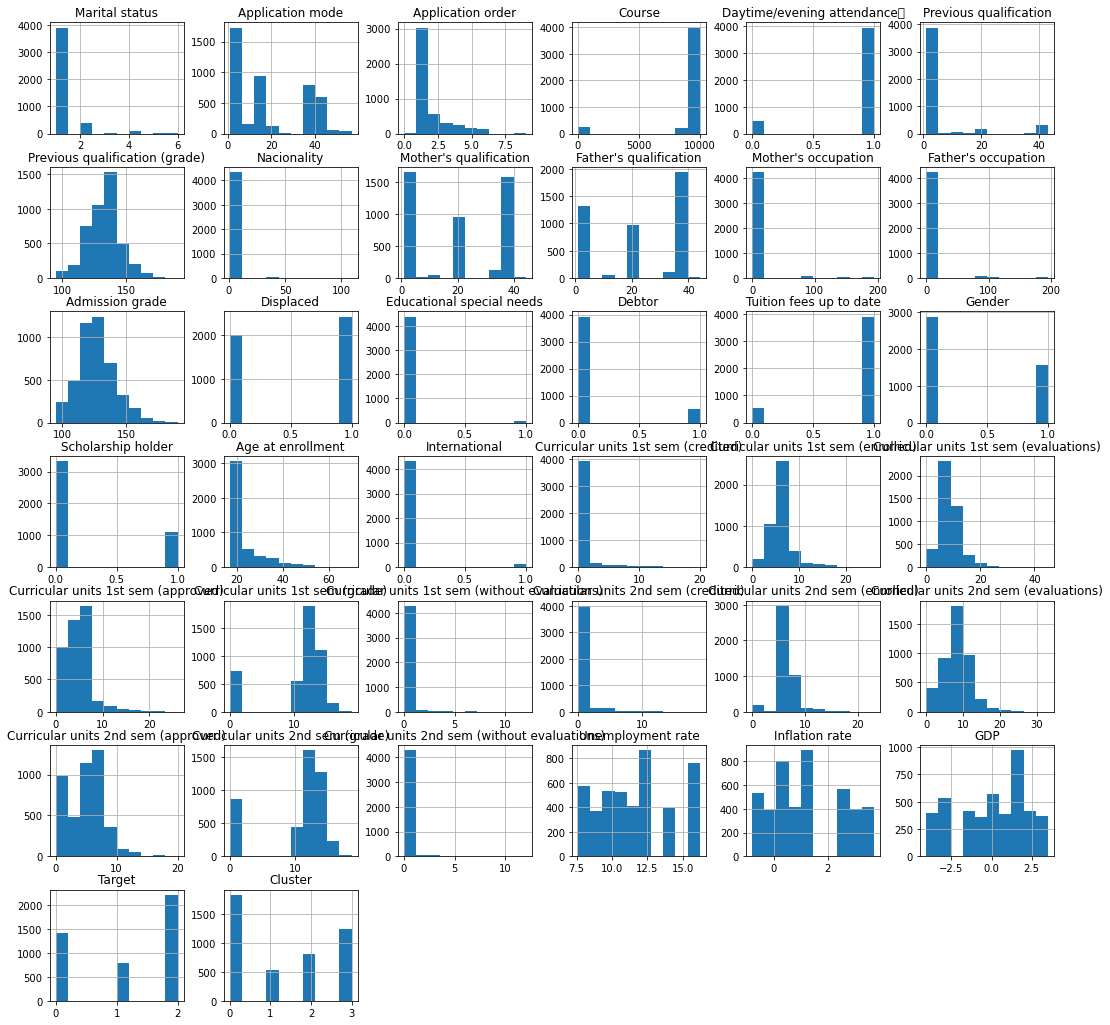

c:\Users\Nathanael P.A\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\Nathanael P.A\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


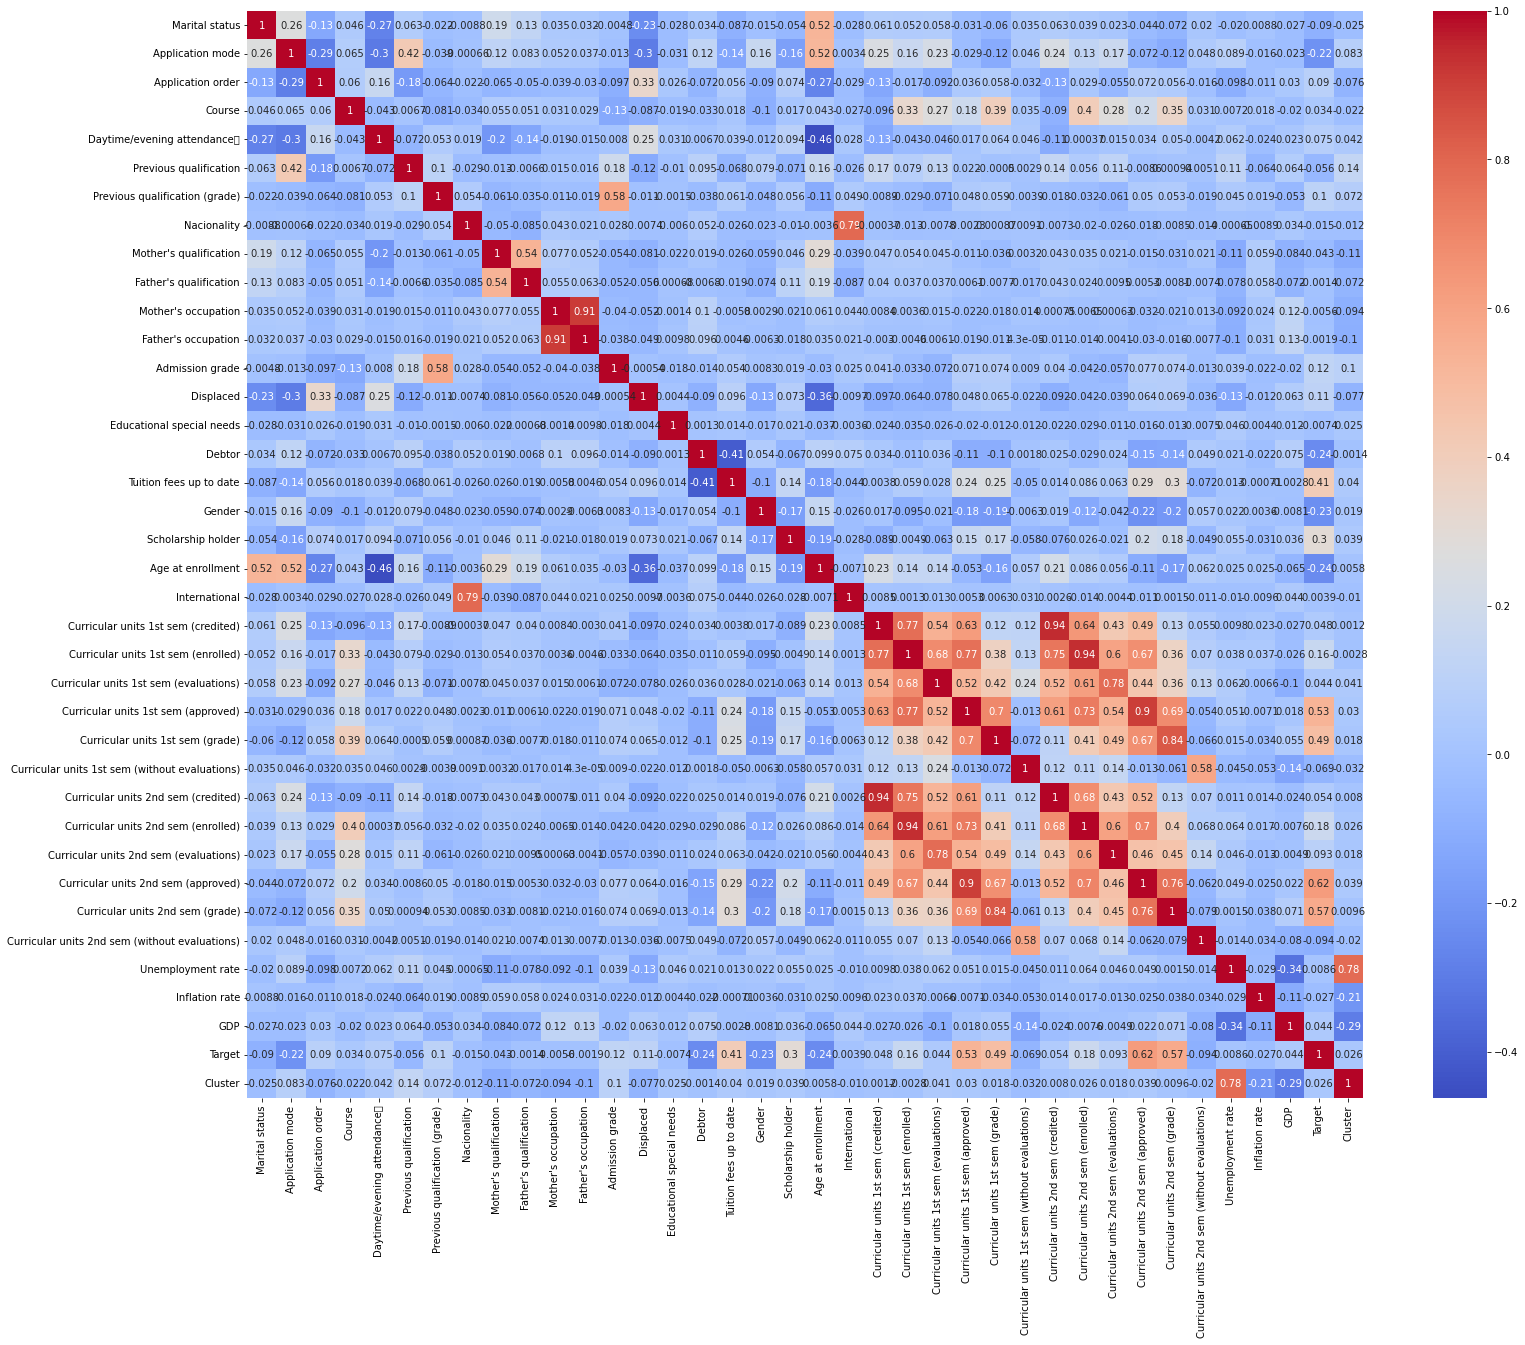

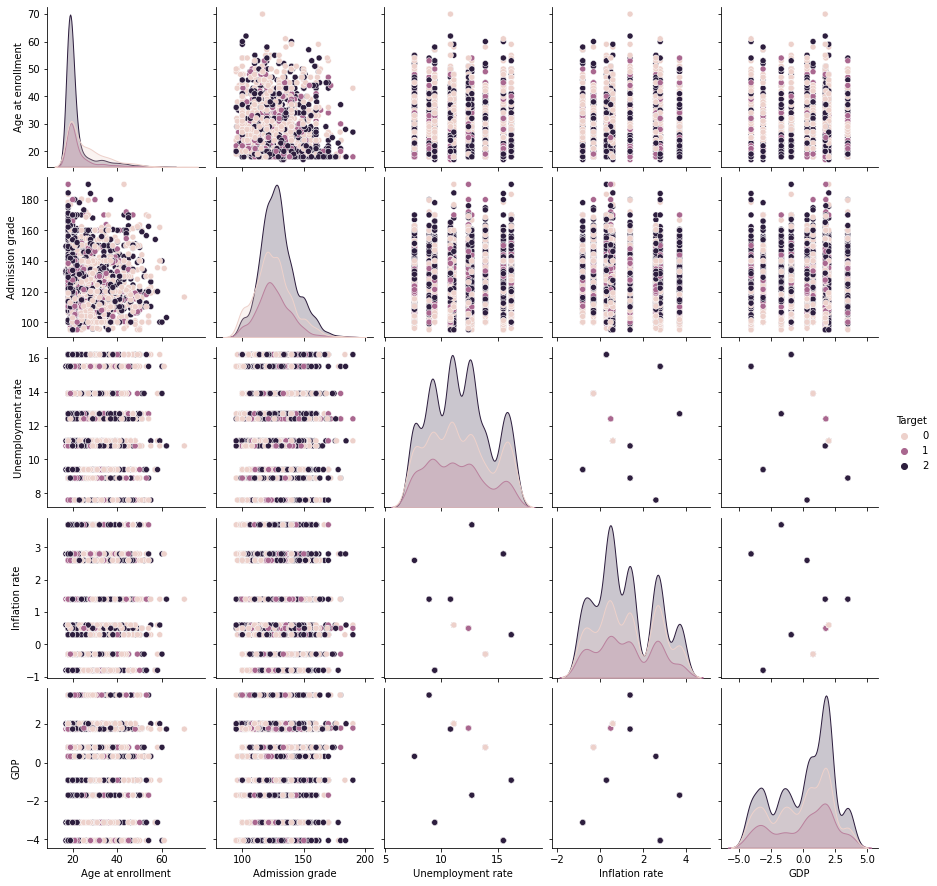

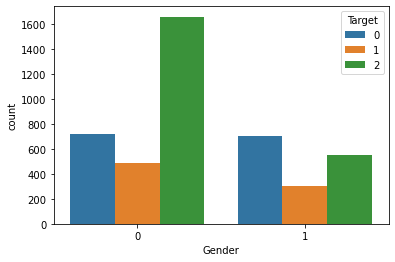

In [33]:
df.hist(figsize=(18, 18))
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

numerical_features = df[['Age at enrollment', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']]
sns.pairplot(numerical_features, hue='Target')
plt.show()

categorical_features = df[['Gender', 'Target']]
sns.countplot(x='Gender', hue='Target', data=categorical_features)
plt.show()

Clustering (K-Means)

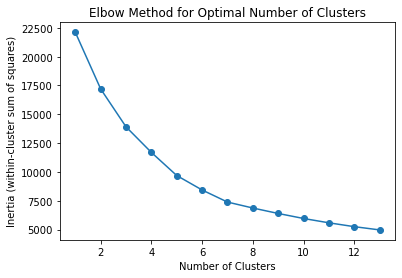

In [28]:
cluster_features = df[['Age at enrollment', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']]

scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

inertia_values = []
possible_clusters = range(1, 14)

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(cluster_features_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(possible_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

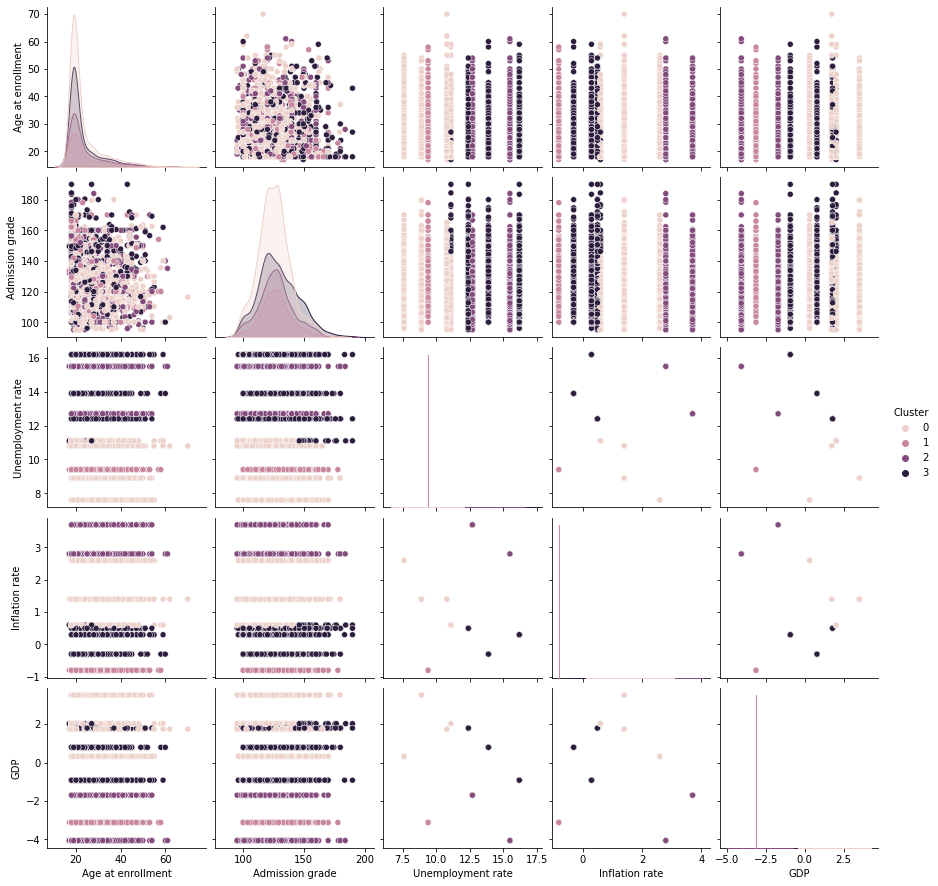

In [27]:
optimal_num_clusters = 4

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_features_scaled)

sns.pairplot(df[['Age at enrollment', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP', 'Cluster']], hue='Cluster')
plt.show()

Prediction Model (Random Forest Classifier)

In [35]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       316
           1       0.49      0.30      0.38       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



Prediction Model (Logistic Regression)

In [36]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')

print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



Prediction Model (Support Vector Machine(SVM))

In [37]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       316
           1       0.48      0.32      0.38       151
           2       0.75      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



Prediction Model (K-Nearest Neighbors (KNN))

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')

print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       316
           1       0.37      0.28      0.32       151
           2       0.72      0.87      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.70      0.69       885



Conclusion:
Prediction Model sorted in order based on highest accruacy to lowest accuracy are as follows:
1. Random Forest Classifier (0.76)
2. Support Vector Machine (0.76)
3. Logistic Regression (0.75)
4. K-Nearest Neighbor (0.70)